Primeras filas del dataset:


,Embarazos,Glucosa,Presion,Piel,Insulina,IMC,DiabetesPedigree,Edad,Clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Varianza explicada por los 2 componentes PCA: 95.01%


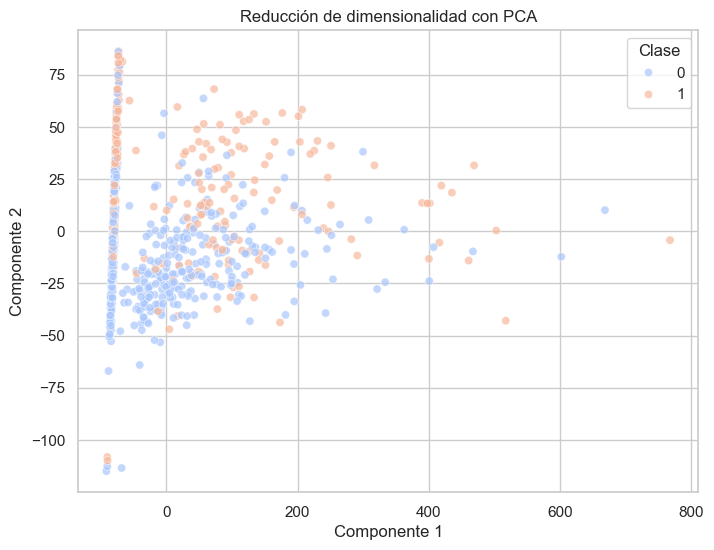

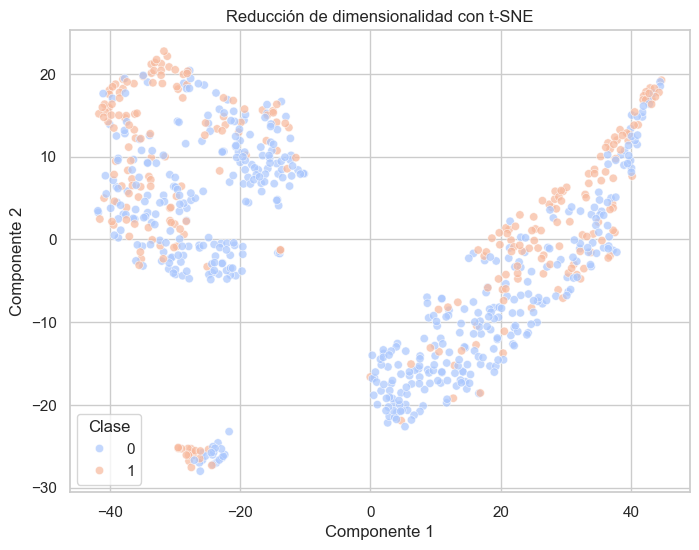

[Original] Exactitud: 0.7489, Tiempo: 0.0135s
[PCA] Exactitud: 0.7446, Tiempo: 0.0100s

📌 Preguntas de control:
- ¿Cómo cambia el rendimiento con reducción de dimensionalidad?
- ¿En qué casos conviene aplicar PCA?
- ¿Qué ventajas tiene reducir la dimensionalidad con datos ruidosos?


In [1]:
# Práctica N°9 - Reducción de Dimensionalidad con PCA y t-SNE (Dataset Diabetes)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Cargar el dataset de diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ["Embarazos", "Glucosa", "Presion", "Piel", "Insulina", "IMC", "DiabetesPedigree", "Edad", "Clase"]
df = pd.read_csv(url, header=None, names=columnas)

print("Primeras filas del dataset:")
display(df.head())

X = df.drop("Clase", axis=1)
y = df["Clase"]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"Varianza explicada por los 2 componentes PCA: {pca.explained_variance_ratio_.sum():.2%}")

# Visualización PCA
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("Reducción de dimensionalidad con PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("Reducción de dimensionalidad con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

# Comparación con KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modelo con datos originales
start = time.time()
model_orig = KNeighborsClassifier()
model_orig.fit(X_train, y_train)
pred_orig = model_orig.predict(X_test)
end = time.time()
print(f"[Original] Exactitud: {accuracy_score(y_test, pred_orig):.4f}, Tiempo: {end - start:.4f}s")

# Modelo con PCA
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

start = time.time()
model_pca = KNeighborsClassifier()
model_pca.fit(Xpca_train, ypca_train)
pred_pca = model_pca.predict(Xpca_test)
end = time.time()
print(f"[PCA] Exactitud: {accuracy_score(ypca_test, pred_pca):.4f}, Tiempo: {end - start:.4f}s")

# Preguntas de control
print("\n📌 Preguntas de control:")
print("- ¿Cómo cambia el rendimiento con reducción de dimensionalidad?")
print("- ¿En qué casos conviene aplicar PCA?")
print("- ¿Qué ventajas tiene reducir la dimensionalidad con datos ruidosos?")
